Ottimizzazione di un modello basato sulla regressione logistica tramite discesa del
gradiente, prima in maniera completamente autonoma, poi sfruttando la libreria SciKit-Learn

In [1]:
# Import librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc

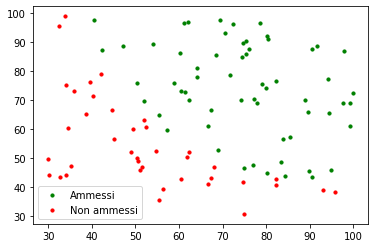

In [2]:
# caricamento dataset
data = pd.read_csv("data/exams_data.csv")

# X = valori relativi alle features, tutte le colonne del dataset eccetto l'ultima
X = data.iloc[:, :-1]

# y = valori target, l'ultima colonna del dataseet
y = data.iloc[:, -1]

# filtro sugli ammessi
ammessi = data.loc[y == 1]

# filtro sui non ammessi
non_ammessi = data.loc[y == 0]

# plotto i risultati
plt.scatter(ammessi.iloc[:, 0], ammessi.iloc[:, 1], s=10, label='Ammessi', color="green")
plt.scatter(non_ammessi.iloc[:, 0], non_ammessi.iloc[:, 1], s=10, label='Non ammessi', color="red")
plt.legend()
plt.show()

In [3]:
# preparazione del dataset
X = np.c_[np.ones((X.shape[0], 1)), X] # c_ effettua una concatenazione sul secondo asse (colonne)
                                       # è una "shortcut" di numpy su una funzione largamente utilizzata e, per
                                       # questo, altamente ottimizzata ed efficiente
                                       #
                                       # ora ogni esempio ha come primo valore un 1, utilizzato di seguito per essere
                                       # moltiplicato per il primo parametro (theta0), il "bias" del modello
y = y.values # trasformo y da una Pandas Series in una lista
y = y[:, np.newaxis] # trasformo y in una matrice di n righe ed una colonna, abbiamo aggiunto una nuova dimensione con np.newaxis
theta = np.zeros((X.shape[1], 1)) # tre parametri della funzione ipotesi

In [4]:
def sigmoid(x):
    # Funzione di attivazione per mappare i
    # numeri reali di input su valori tra 0 e 1
    return 1 / (1 + np.exp(-x))

def cost_function(theta, x, y):
    # Calcola il costo della funzione per tutti gli esempi
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y      * np.log(    sigmoid(np.dot(x, theta))) +
                                  (1 - y) * np.log(1 - sigmoid(np.dot(x, theta))))
    return total_cost

def gradient(theta, x, y):
    # Calcola il gradiente della funzione costo al punto theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

In [5]:
def fit(x, y, theta):
    # minimizzo il costo della funzione cost_function rispetto
    # ai parametri theta tramite la funzione fmin_tnc della
    # libreria scipy
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y.flatten()))
    return opt_weights[0]

parameters = fit(X, y, theta)

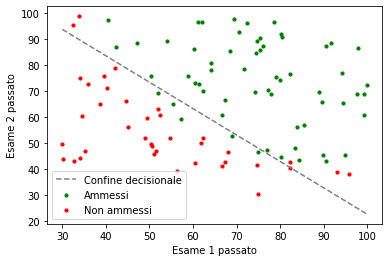

In [6]:
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Confine decisionale', color="gray", linestyle='--')
plt.xlabel('Esame 1 passato')
plt.ylabel('Esame 2 passato')
plt.scatter(ammessi.iloc[:, 0], ammessi.iloc[:, 1], s=10, label='Ammessi', color="green")
plt.scatter(non_ammessi.iloc[:, 0], non_ammessi.iloc[:, 1], s=10, label='Non ammessi', color="red")
plt.legend()
plt.show()

In [7]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return sigmoid(np.dot(x, theta))

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

print('Accuratezza', accuracy(X, y.flatten()))
print('Parametri ottimizzati', parameters)

Accuratezza 88.88888888888889
Parametri ottimizzati [-24.8655808    0.20334359   0.19985054]


In [8]:
# implementazione con sci-kit learn:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

X = X[:, 1:]
y = np.reshape(y, (len(y), 1))

model.fit(X, y.flatten())
predicted_classes = model.predict(X)
accuracy = accuracy_score(y, predicted_classes)
parameters = model.coef_
bias = model.intercept_

print('Accuratezza', accuracy * 100)
print('Parametri:', parameters)
print('Bias:', bias)

Accuratezza 88.88888888888889
Parametri: [[0.20251777 0.19901181]]
Bias: [-24.76261953]


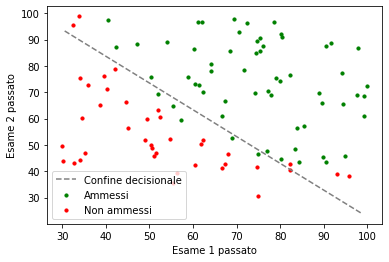

In [9]:
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (bias[0] + np.dot(parameters[0][0], x_values)) / parameters[0][1]

plt.plot(x_values, y_values, label='Confine decisionale', color="gray", linestyle='--')
plt.xlabel('Esame 1 passato')
plt.ylabel('Esame 2 passato')
plt.scatter(ammessi.iloc[:, 0], ammessi.iloc[:, 1], s=10, label='Ammessi', color="green")
plt.scatter(non_ammessi.iloc[:, 0], non_ammessi.iloc[:, 1], s=10, label='Non ammessi', color="red")
plt.legend()
plt.show()

In [10]:
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]



IndexError: index 1 is out of bounds for axis 0 with size 1